In [221]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [222]:
headers = {'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/47.0.2526.106 Safari/537.36'}

page = "https://www.transfermarkt.com/malaysia-super-league/startseite/wettbewerb/MYS1"
pageTree = requests.get(page, headers=headers)
pageSoup = BeautifulSoup(pageTree.content, 'html.parser')

In [223]:
TeamsList = []
TeamLinksList = []

In [224]:
Teams = pageSoup.find_all("td", {"class": "hauptlink no-border-links"})
TeamLinks = pageSoup.find_all("td", {"class": "hauptlink no-border-links"})

In [225]:
for i in range(0, len(Teams)):
    str_Teams = str(Teams[i]).split('title="',1)[1].split('">',1)[0]
    TeamsList.append(str_Teams)

In [226]:
for i in range(0, len(TeamLinks)):
    str_TeamLinks = str(TeamLinks[i]).split('a href="',1)[1].split('"',1)[0]
    TeamLinksList.append("https://www.transfermarkt.com" + str_TeamLinks)

In [227]:
df = pd.DataFrame({
                    "Team":TeamsList,
                    "Link":TeamLinksList
})

In [296]:
PlayerTeamsList = []
PlayersList = []
NumberList = []
AgeList = []
PositionList = []
NationList = []
ValueList = []

In [297]:
for x in range(0, len(TeamLinksList)):
    page = TeamLinksList[x]
    pageTree = requests.get(page, headers=headers)
    pageSoup = BeautifulSoup(pageTree.content, 'html.parser')
    
    TeamNames = pageSoup.find_all("h1", {"class": "data-header__headline-wrapper data-header__headline-wrapper--oswald"})
    Players = pageSoup.find_all("img", {"class": "bilderrahmen-fixed lazy lazy"})
    Numbers = pageSoup.find_all("div", {"class": "rn_nummer"})
    Age = pageSoup.find_all("td", {"class": "zentriert"})
    Positions = pageSoup.find_all("table", {"class": "inline-table"})
    Nationality = pageSoup.find_all("td", {"class": "zentriert"})
    Values = pageSoup.find_all("td", {"class": "rechts hauptlink"})
    
    for i in range(0, len(Players)):
        str_Team = str(TeamNames).split('">\n            ',1)[1].split('        </h1>',1)[0]
        PlayerTeamsList.append(str_Team)
    
    for i in range(0, len(Players)):
        str_Players = str(Players[i]).split('" class',1)[0].split('<img alt="',1)[1]
        PlayersList.append(str_Players)
    
    for i in range(0, len(Numbers)):
        str_Numbers = str(Numbers[i]).split('class="rn_nummer">',1)[1].split('</div>',1)[0]
        NumberList.append(str_Numbers)
    
    for i in range(1, (len(Players)*3), 3):
        str_Age = str(Age[i]).split("(",1)[1].split(")",1)[0]
        AgeList.append(str_Age)
        
    for i in range(0, len(Positions)):
        str_Position = str(Positions[i]).split('<td>', 1)[1].split('</td>', 1)[0].split('\n ', 1)[1].split('           ', 1)[1].split('        ',1)[0]
        PositionList.append(str_Position)
    
    grouped_positionList = []
    
    for j in range(0, len(PositionList)):
        if 'Striker' in PositionList[j]:
            grouped_positionList.append('Forwards')
        elif 'Forward' in PositionList[j]:
            grouped_positionList.append('Forwards')
        elif 'Midfield' in PositionList[j]:
            grouped_positionList.append('Midfielders')
        elif 'Midfielder' in PositionList[j]:
            grouped_positionList.append('Midfielders')
        elif 'Winger' in PositionList[j]:
            grouped_positionList.append('Midfielders')
        elif 'Back' in PositionList[j]:
            grouped_positionList.append('Defenders')
        elif 'Defender' in PositionList[j]:
            grouped_positionList.append('Defenders')
        else:
            grouped_positionList.append(PositionList[j])
    
    for i in range(2, (len(Players)*3),3):
        str_Nationality = str(Nationality[i]).split('" class',1)[0].split('<img alt="',1)[1]
        NationList.append(str_Nationality)
    
    for i in range(0, len(Values)):
        ValueList.append(Values[i].text)
        
    cleaned_values=[]

    for a in range(0, len(ValueList)):
        if 'k' in ValueList[a]:
            str_a = str(ValueList[a]).split('€')[1].split('k')[0]
            flt_a = float(str_a)*1000
            cleaned_values.append(flt_a)
        elif 'm' in ValueList[a]:
            str_a = str(ValueList[a]).split('€')[1].split('m')[0]
            flt_a = float(str_a)*1000000
            cleaned_values.append(flt_a)
        else:
            cleaned_values.append(float(a))


        
    
    
    

In [298]:
PositionList
len(PositionList)

360

In [299]:
grouped_positionList = []
    
for j in range(0, len(PositionList)):
    if 'Striker' in PositionList[j]:
        grouped_positionList.append('Forwards')
    elif 'Forward' in PositionList[j]:
        grouped_positionList.append('Forwards')
    elif 'Midfield' in PositionList[j]:
        grouped_positionList.append('Midfielders')
    elif 'Midfielder' in PositionList[j]:
        grouped_positionList.append('Midfielders')
    elif 'Winger' in PositionList[j]:
        grouped_positionList.append('Midfielders')
    elif 'Back' in PositionList[j]:
        grouped_positionList.append('Defenders')
    elif 'Defender' in PositionList[j]:
        grouped_positionList.append('Defenders')
    else:
        grouped_positionList.append(PositionList[j])
        

print(grouped_positionList)
print(len(grouped_positionList))
            

['Goalkeeper', 'Goalkeeper', 'Goalkeeper', 'Goalkeeper', 'Defenders', 'Defenders', 'Defenders', 'Defenders', 'Defenders', 'Defenders', 'Defenders', 'Defenders', 'Defenders', 'Defenders', 'Defenders', 'Midfielders', 'Midfielders', 'Midfielders', 'Midfielders', 'Midfielders', 'Midfielders', 'Midfielders', 'Midfielders', 'Midfielders', 'Midfielders', 'Midfielders', 'Midfielders', 'Midfielders', 'Midfielders', 'Midfielders', 'Midfielders', 'Midfielders', 'Forwards', 'Forwards', 'Goalkeeper', 'Goalkeeper', 'Goalkeeper', 'Goalkeeper', 'Goalkeeper', 'Defenders', 'Defenders', 'Defenders', 'Defenders', 'Defenders', 'Defenders', 'Defenders', 'Defenders', 'Defenders', 'Defenders', 'Defenders', 'Defenders', 'Midfielders', 'Midfielders', 'Midfielders', 'Midfielders', 'Midfielders', 'Midfielders', 'Midfielders', 'Midfielders', 'Midfielders', 'Midfielders', 'Midfielders', 'Midfielders', 'Midfielders', 'Midfielders', 'Midfielders', 'Forwards', 'Goalkeeper', 'Goalkeeper', 'Goalkeeper', 'Defenders', 'De

In [300]:
final_df = pd.DataFrame({
                         "Team":PlayerTeamsList,
                         "Player":PlayersList,
                         "Number":NumberList,
                         "Age":AgeList,
                         "Position":PositionList,
                         "Group Position":grouped_positionList,
                         "Nationality":NationList,
                         "Value EUR":cleaned_values                        
                        })

In [301]:
final_df

,Team,Player,Number,Age,Position,Group Position,Nationality,Value EUR
0,Johor Darul Ta'zim,Syihan Hazmi,33,28,Goalkeeper,Goalkeeper,Malaysia,300000.0
1,Johor Darul Ta'zim,Izham Tarmizi,-,32,Goalkeeper,Goalkeeper,Malaysia,100000.0
2,Johor Darul Ta'zim,Farizal Marlias,1,37,Goalkeeper,Goalkeeper,Malaysia,100000.0
3,Johor Darul Ta'zim,Haziq Nadzli,26,26,Goalkeeper,Goalkeeper,Malaysia,50000.0
4,Johor Darul Ta'zim,Jordi Amat,5,31,Centre-Back,Defenders,Indonesia,800000.0
...,...,...,...,...,...,...,...,...
355,Kelantan United,S. Sharvin,21,23,Right Winger,Midfielders,Malaysia,50000.0
356,Kelantan United,Royizzat Daud,16,24,Striker,Forwards,Malaysia,50000.0
357,Kelantan United,Haziq Subri,11,24,Striker,Forwards,Malaysia,25000.0
358,Kelantan United,Nik Azli Nik Alias,26,27,Centre-Forward,Forwards,Malaysia,25000.0


In [310]:
# Export the DataFrame to an Excel file
final_df.to_excel(r"C:\Users\izzat\OneDrive\Desktop\MalaysiaSuperLeague_TeamsSquadAnalysis\MSL_TeamsSquadData.xlsx", index=False)

In [311]:
# Export the DataFrame to an csv file
final_df.to_csv(r"C:\Users\izzat\OneDrive\Desktop\MalaysiaSuperLeague_TeamsSquadAnalysis\MSL_TeamsSquadData.csv", index=False)

In [312]:
# Load the dataset
msldata = pd.read_csv(r"C:\Users\izzat\OneDrive\Desktop\MalaysiaSuperLeague_TeamsSquadAnalysis\MSL_TeamsSquadData.csv")

# Display the first few rows of the dataset
#print(msldata.head())


In [313]:
# Display column information
#print(msldata.info())

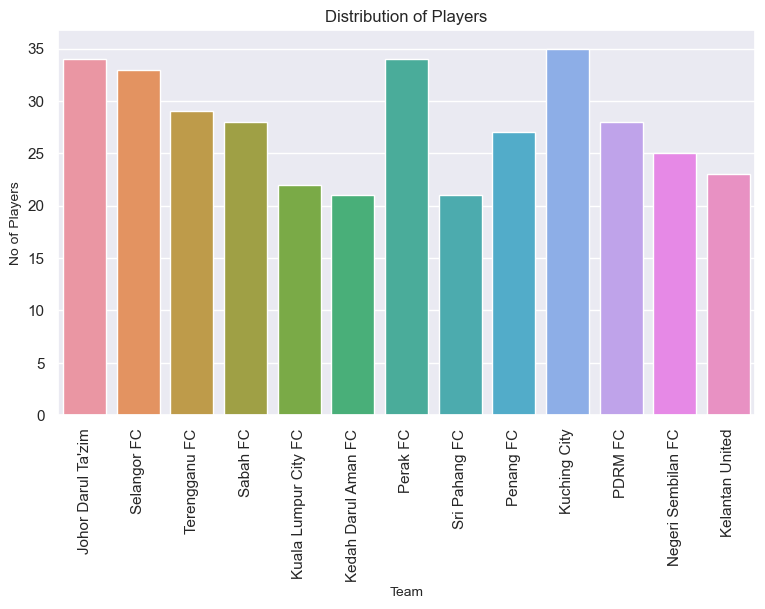

In [315]:
# Plotting the distribution of players
sns.set(style="whitegrid")
sns.set(font_scale=1.0)
plt.figure(figsize=(9, 5))
sns.countplot(data=msldata, x='Team')
plt.title('Distribution of Players')
plt.xlabel('Team', fontsize=10)
plt.ylabel('No of Players', fontsize=10)
# Rotate the tick labels in the second subplot
plt.xticks(rotation=90)
plt.show()

In [316]:
# Display Top 10 Most Expensive Players in MSL 24/25 Season
Top10Value = msldata.nlargest(n=10, columns=['Value EUR'])

# Display Top 10 Least Expensive Players in MSL 24/25 Season
Bottom10Value = msldata.nsmallest(n=10, columns=['Value EUR'])

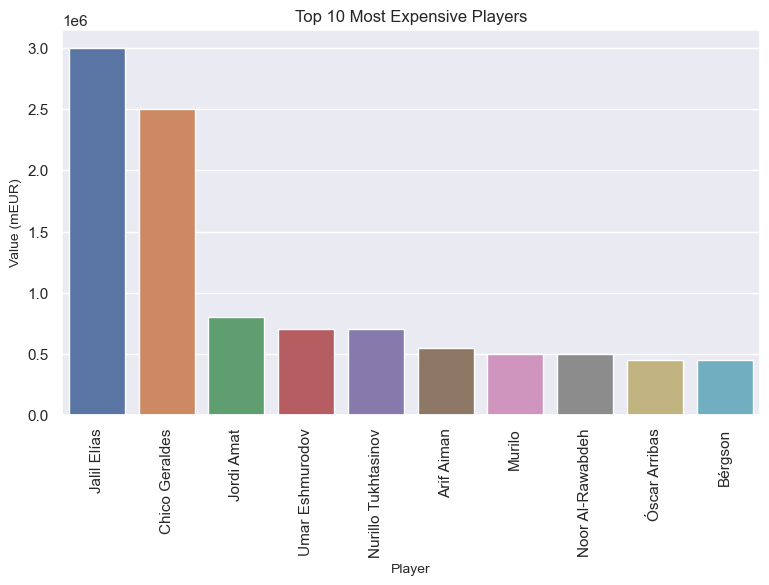

In [317]:
# Plotting Value 
sns.set(style="whitegrid")
sns.set(font_scale=1.0)
plt.figure(figsize=(9, 5))
sns.barplot(Top10Value, x="Player", y="Value EUR")
plt.title('Top 10 Most Expensive Players')
plt.xlabel('Player', fontsize=10)
plt.ylabel('Value (mEUR)', fontsize=10)
# Rotate the tick labels in the second subplot
plt.xticks(rotation=90)
plt.show()

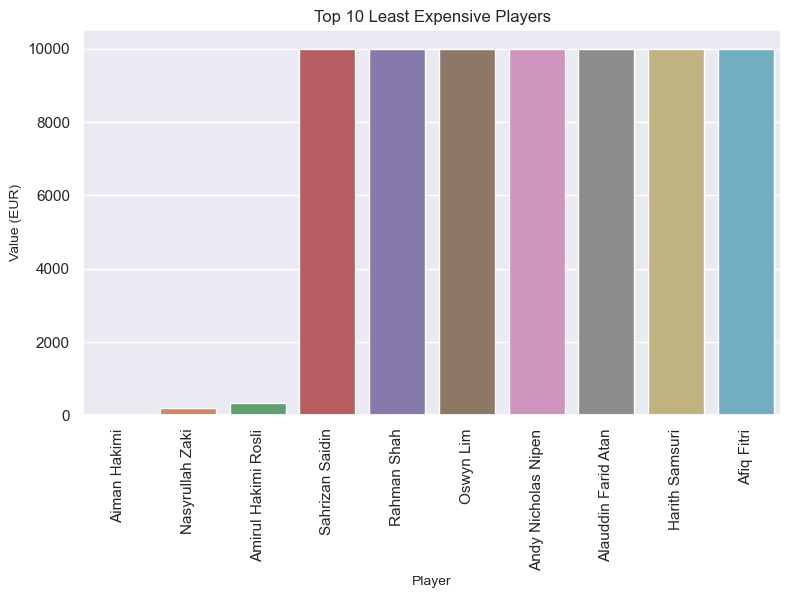

In [318]:
# Plotting Top 10 Least Expensive Players in MSL 24/25 Season
sns.set(style="whitegrid")
sns.set(font_scale=1.0)
plt.figure(figsize=(9, 5))
sns.barplot(Bottom10Value, x="Player", y="Value EUR")
plt.title('Top 10 Least Expensive Players')
plt.xlabel('Player', fontsize=10)
plt.ylabel('Value (EUR)', fontsize=10)
# Rotate the tick labels in the second subplot
plt.xticks(rotation=90)
plt.show()

In [366]:
pv_count = msldata.pivot_table('Value EUR', index='Team', columns='Group Position', aggfunc='count')
pv_sum = msldata.pivot_table('Value EUR', index='Team', columns='Group Position', aggfunc='sum')
pv_count
pv_sum

Group Position,Defenders,Forwards,Goalkeeper,Midfielders
Team,,,,
Johor Darul Ta'zim,3475000.0,575000.0,550000.0,8950000.0
Kedah Darul Aman FC,1000000.0,400000.0,400000.0,1550000.0
Kelantan United,475000.0,125000.0,175000.0,625000.0
Kuala Lumpur City FC,1450000.0,400000.0,150000.0,1675000.0
Kuching City,900000.0,450000.0,110000.0,1010000.0
Negeri Sembilan FC,735000.0,275336.0,225000.0,735000.0
PDRM FC,675000.0,275000.0,125000.0,1250000.0
Penang FC,975000.0,125000.0,300000.0,1125000.0
Perak FC,910000.0,175000.0,250000.0,1700000.0


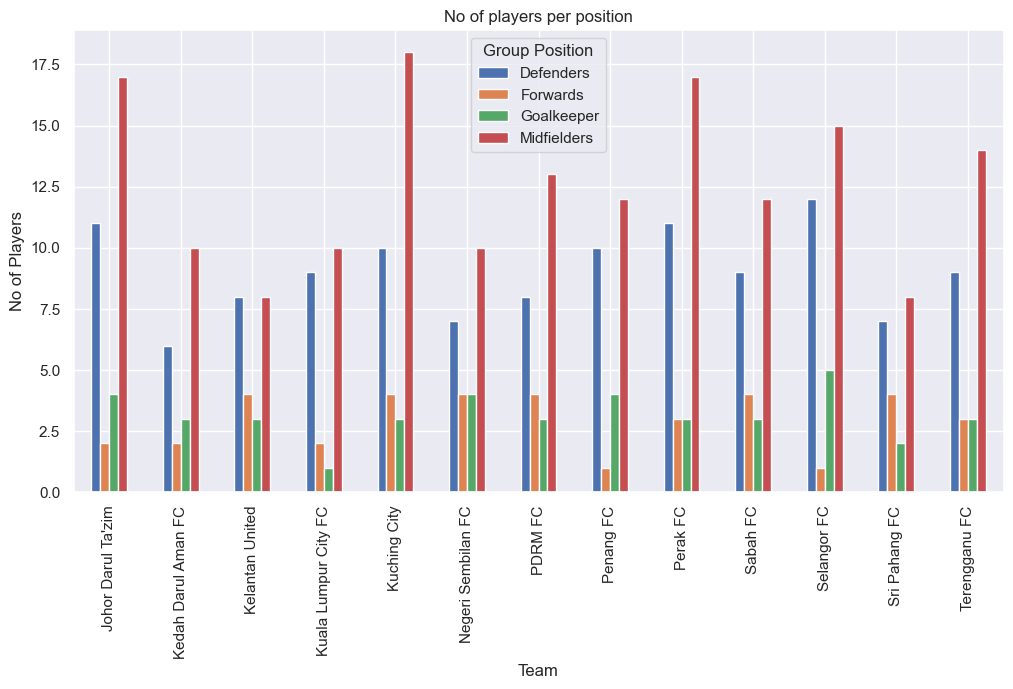

In [369]:
# Plotting bar chart from  pv_count
pv_count.plot(kind='bar', figsize=(12, 6))

# graph title
plt.title('No of players per position')

# naming the x and y axis
plt.xlabel('Team')
plt.ylabel('No of Players')

# Rotate the tick labels in the second subplot
plt.xticks(rotation=90)

plt.show()

Text(0, 1.05, 'in millions')

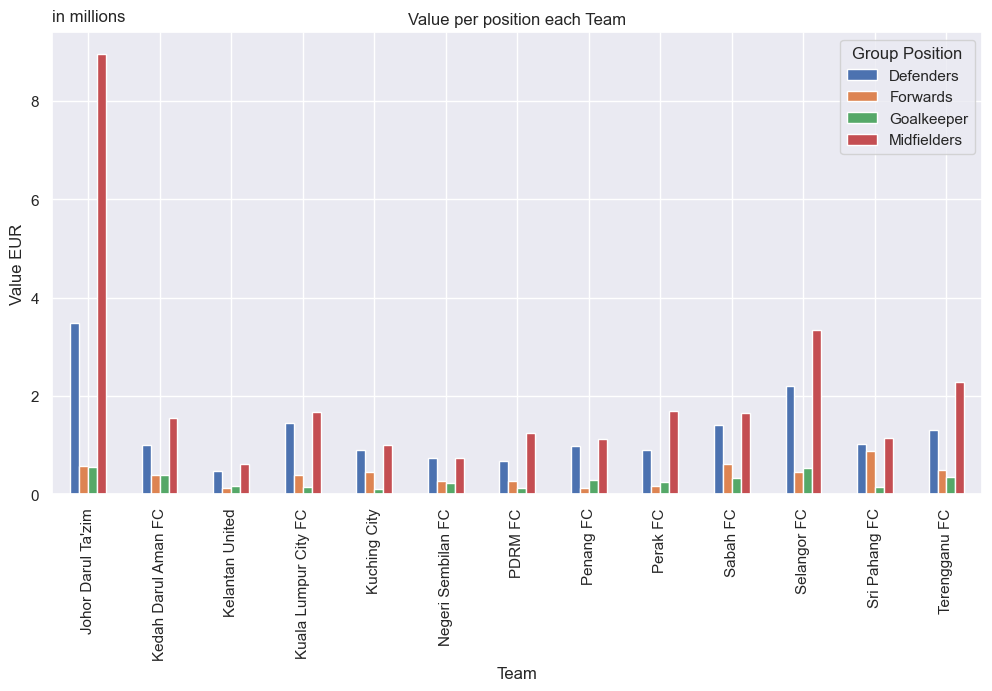

In [390]:
from matplotlib.ticker import NullFormatter

def formatter(x, pos):
    return str(round(x / 1e6))

ax = pv_sum.plot(kind='bar', figsize=(12, 6))

# graph title
plt.title('Value per position each Team')

# naming the x and y axis
plt.xlabel('Team')
plt.ylabel('Value EUR')

#fig, ax = plt.subplots()
ax.yaxis.set_major_formatter(formatter)
#ax.yaxis.set_minor_formatter(NullFormatter())
#ax.plot([0, 1e6])
ax.text(0, 1.05, "in millions", transform = ax.transAxes, ha = "left", va = "top")